In [8]:
# house price prediction using linear regression
from sklearn.datasets import load_iris


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = load_iris()

In [14]:
type(df)

sklearn.utils._bunch.Bunch

In [16]:
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [18]:
dataset = pd.DataFrame(df.data) #changes the dictionary into dataframe. 
dataset

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
dataset.columns = df.feature_names
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
dataset['species'] = df.target

In [24]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
#divigding hte dataset into independent and dependemt features.
X = dataset.iloc[:, :-1] # this is independent feature
y = dataset.iloc[:,-1] #target variable / dependent features

In [28]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)

mse=cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-0.05414031903866975


In [70]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
# params={'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5,10,20]}
params={'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5,10,20, 30, 35, 40, 45, 50, 55, 100]}

ridge_regressor= GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=10) # tried previously with cv=5
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [72]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-0.053624824101862464


In [74]:
# Lets try Lasso
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
#params={'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5,10,20]}
params={'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5,10,20, 30, 35, 40, 45, 50, 55, 100]}

lasso_regressor= GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=10)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [76]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-0.05427382052467018


In [88]:
from sklearn.metrics import r2_score
y_pred = lasso_regressor.predict(X_test)

r2_score_lasso=r2_score(y_pred, y_test)
print(r2_score_lasso)

0.9374069672013235


In [90]:
y_pred = ridge_regressor.predict(X_test)

r2_score_ridge=r2_score(y_pred, y_test)
print(r2_score_ridge)

0.93569896193424


In [100]:
y_pred = lin_reg.predict(X_test)

r2_score_lin=r2_score(y_pred, y_test)
print(r2_score_lin)

0.9377932346599913


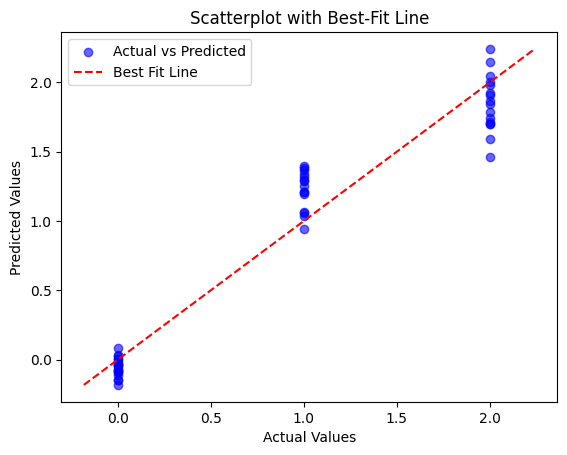

In [126]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Actual vs Predicted')

# Best-fit line (diagonal line for perfect predictions)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Best Fit Line')

# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatterplot with Best-Fit Line')
plt.legend()
plt.show()